# Importar Bibliotecas

In [1]:
# Mudar diretório para chamar scripts com funções
import os
os.chdir('/home/francisco/MECAD/2º Ano/Estágio/forcera/scripts/scripts_py')

# Importar funções e flags definidas em flags.py e functions.py
from functions import *
from flags import * 

import psycopg2
from psycopg2 import OperationalError
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from scipy.optimize import curve_fit
import seaborn as sns
from IPython.display import HTML
import webbrowser
from collections import defaultdict
import networkx as nx

plt.rcParams['figure.figsize'] = (10,8)

# Ligação à base de dados

In [2]:
conn = psycopg2.connect(
    host = "contratos-base-gov1.cf87yxnqgph8.eu-central-1.rds.amazonaws.com",
    port = 5432,
    #database = "contratosbasegov",
    user = "contratosbasegov",
    password = "8n9nyeTBFUyCcLJShNrZdPUai2KQkue4")

cur = conn.cursor()

In [3]:
cur.execute('''ROLLBACK;''')

# R031 : Comparação entre Preço Base e Preço Contratual em Concursos Públicos

In [4]:
# Filtrar contratos : ID's concursos públicos com CPV's começados por 72
cpub = (cpv('72', 'Concurso público'))

In [5]:
# Dataframe referente ao conjuntos de contratos públicos celebrados no ramo de consultoria IT 
cp = contratos(cpub)

In [6]:
# A tabela é representada de forma correta : o id do anúncio bate certo com o preço base, contratual e restantes colunas que são relevantes
# Contudo, a ordem dos ID's em cpub é diferente da ordem dos ids na coluna ID da dataframe
# A ordem os id's guardados na variável cpub não bate certo
# Na célula a seguir a esta, é preciso redefini-la
cp = cp.rename(columns={0:'ID', 1:'NrAnuncio', 2:'PrecoBase', 3:'Prazo', 16:'DataPub', 17:'DataCel', 18:'PrecoContratual',20:'Adjudicante', 22:'Adjudicatária' ,23:'EntConcorrentes'})

cp.PrecoBase.replace('None',0).astype(float)
cp.PrecoContratual.replace('None',0).astype(float)

P = cp.head(2)
h(P)

ID,NrAnuncio,PrecoBase,Prazo,4,5,6,7,8,9,10,11,12,13,14,15,DataPub,DataCel,PrecoContratual,19,Adjudicante,21,Adjudicatária,EntConcorrentes,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
10001448,4840/2023,20000.00,6,False,6417636,12848310,2023-03-27,61,2,False,False,https://dre.pt/application/file/211056048,Anúncio de procedimento,Concurso público,Aquisição de Licenciamento Microsoft,2023-05-22,2023-05-22,17999.09,366,Centro de Formação Profissional das Pescas e do Mar (FOR-MAR) (508590582)(https://www.base.gov.pt/Base4/pt/detalhe/?type=entidades&id=19),"Artigo 20.º, n.º 1, alínea b) do Código dos Contratos Públicos","VIMAPONTO - Equipamentos e Serviços Informática, S.A. (503063851)(https://www.base.gov.pt/Base4/pt/detalhe/?type=entidades&id=14060)","Exitus, Soluções Tecnológicas, Lda. (509117660)|||INETUM ESPAÑA SA (980079659)|||TCSI Digibéria - Tecnologias de Informação, S.A. (502670355)|||LINKCOM - SISTEMAS DE INFORMAÇÃO SA (505046547)|||KONICA MINOLTA BUSINESS SOLUTIONS PORTUGAL, UNIPESSOAL, LDA (502120070)",https://www.base.gov.pt/Base4/pt/detalhe/?type=anuncios&id=343442,https://community.vortal.biz/PRODPublic/Tendering/OpportunityDetail/Index?noticeUID=PT1.NTC.2325050,https://www.base.gov.pt/Base4/pt/resultados/?type=doc_documentos&id=1999107&ext=.pdf,false,72212218-0,False,pagamento antecipado,None,False,False,2023-09-25,False,None,False,Aquisição de serviços,Serviços de desenvolvimento de software para gestão de licenças,Principal,17999.09,Aquisição de Licenciamento Microsoft,Não aplicável,Cumprimento integral do contrato,"Portugal, Lisboa, Lisboa",Não aplicável.,Não aplicável.,None,False,False,None,None,False,None,True,None,"Código dos Contratos Públicos (DL111-B/2017) e Lei n.º 30/2021, de 21.05",None,17999.09,1700348541
10004158,4270/2023,409500.00,39,False,6402336,12813822,2023-03-20,56,2,False,False,https://dre.pt/application/file/210454653,Anúncio de procedimento,Concurso público,PC.107.2023.0000067 - Aquisição de serviços de desenvolvimento para reestruturação e adaptação da plataforma de suporte ao programa Porta 65 jovem,2023-05-23,2023-05-22,369980.00,305,"Instituto da Habitação e da Reabilitação Urbana, I. P. (501460888)(https://www.base.gov.pt/Base4/pt/detalhe/?type=entidades&id=11349)","Artigo 20.º, n.º 1, alínea a) do Código dos Contratos Públicos","Opensoft Soluções Informáticas, S.A. (505781999)(https://www.base.gov.pt/Base4/pt/detalhe/?type=entidades&id=4419)",None,https://www.base.gov.pt/Base4/pt/detalhe/?type=anuncios&id=342757,https://www.anogov.com/ip-ihru/faces/app/pap/listaDocs.jsp?papId=14601,https://www.base.gov.pt/Base4/pt/resultados/?type=doc_documentos&id=2000062&ext=.pdf,false,72230000-6,False,None,None,False,False,None,False,None,False,Aquisição de serviços,Serviços de desenvolvimento de software à medida,Principal,369980.0,PC.107.2023.0000067 - Aquisição de serviços de desenvolvimento para reestruturação e adaptação da plataforma de suporte ao programa Porta 65 jovem,Não aplicável,None,Portugal,Não aplicável.,Não aplicável.,None,False,False,None,None,False,None,True,None,"Código dos Contratos Públicos (DL111-B/2017) e Lei n.º 30/2021, de 21.05",None,None,1700350494


In [7]:
cpub = tuple(cp.ID)

In [8]:
# Preço Base e Preço Contratual de todos os contratos públicos realizados para CPV's começados por 72

# Desta forma, ambos os preços são ordenados por ordem decrescente relativamente ao índice
#pb = preco_base3(cpub)
#pc = preco_contrato3(cpub)

# É preferível obter os preços a partir da dataframe visto que não há enganos assim
pb = np.array(cp.PrecoBase.replace('None', 0).astype(float))
pc = np.array(cp.PrecoContratual.replace('None', 0).astype(float))

pb[0], pc[0], cpub[0]

(20000.0, 17999.09, '10001448')

In [9]:
# Conjunto de flags disparadas para o conjunto de contratos em causa
# Largura de 10% em torno do preço base - 0.1
# Rácio máximo aceitável entre preço base e contratual de 10
f = redflag(pb, pc, 0.1, cpub, 10,cp)
f

/home/francisco/MECAD/2º Ano/Estágio/forcera/scripts/scripts_py/flags.py:89: RuntimeWarning: divide by zero encountered in divide
  flags1 = np.where(pbase/pcontr > r)[0]
/home/francisco/MECAD/2º Ano/Estágio/forcera/scripts/scripts_py/flags.py:89: RuntimeWarning: invalid value encountered in divide
  flags1 = np.where(pbase/pcontr > r)[0]
/home/francisco/MECAD/2º Ano/Estágio/forcera/scripts/scripts_py/functions.py:587: RuntimeWarning: divide by zero encountered in scalar divide
  div[i] = pbase[i]/pcont[i]


(('10004158',),
 ('10005180',),
 ('10005452',),
 ('10010396',),
 ('10016322',),
 ('10017290',),
 ('10019761',),
 ('10020982',),
 ('10038045',),
 ('10038791',),
 ('10041743',),
 ('10042376',),
 ('10044243',),
 ('10044498',),
 ('10052145',),
 ('10054158',),
 ('10055820',),
 ('10056756',),
 ('10057589',),
 ('10063680',),
 ('10063908',),
 ('10064025',),
 ('10066763',),
 ('10069033',),
 ('10071148',),
 ('10074358',),
 ('10075940',),
 ('10076421',),
 ('10079116',),
 ('10080707',),
 ('10081892',),
 ('10082883',),
 ('10083360',),
 ('10084124',),
 ('10084241',),
 ('10084688',),
 ('10088495',),
 ('10089348',),
 ('10091751',),
 ('10093824',),
 ('10094141',),
 ('10094308',),
 ('10095461',),
 ('10096038',),
 ('10096080',),
 ('10096841',),
 ('10097533',),
 ('10098326',),
 ('10098866',),
 ('10099006',),
 ('10099171',),
 ('10102898',),
 ('10103775',),
 ('10104331',),
 ('10108665',),
 ('10108756',),
 ('10109047',),
 ('10111070',),
 ('10112951',),
 ('10113116',),
 ('10113459',),
 ('10116174',),
 ('10116

In [10]:
cp.DataCel = pd.to_datetime(cp.DataCel)
cp.DataPub = pd.to_datetime(cp.DataPub)


print(cp.DataCel.min())
print(cp.DataCel.max())

print()

print(cp.DataPub.min())
print(cp.DataPub.max())

2018-04-16 00:00:00
2023-11-28 00:00:00

2022-08-01 00:00:00
2023-11-30 00:00:00


## Análise do preço base

/home/francisco/MECAD/COMP/comp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/francisco/MECAD/COMP/comp/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[]

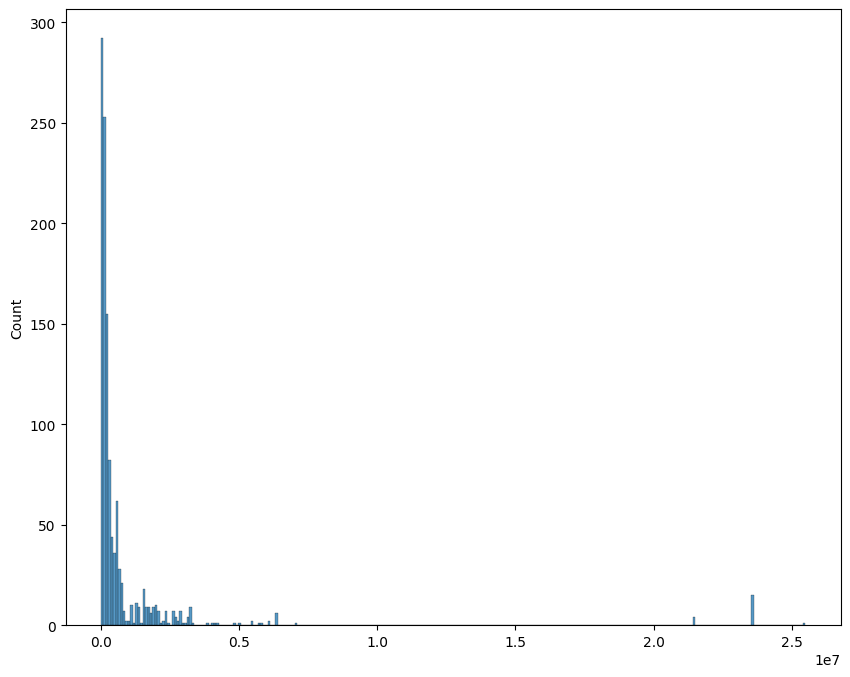

In [11]:
sns.histplot(pb)
plt.plot()

## Análise do preço contratual

/home/francisco/MECAD/COMP/comp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/francisco/MECAD/COMP/comp/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[]

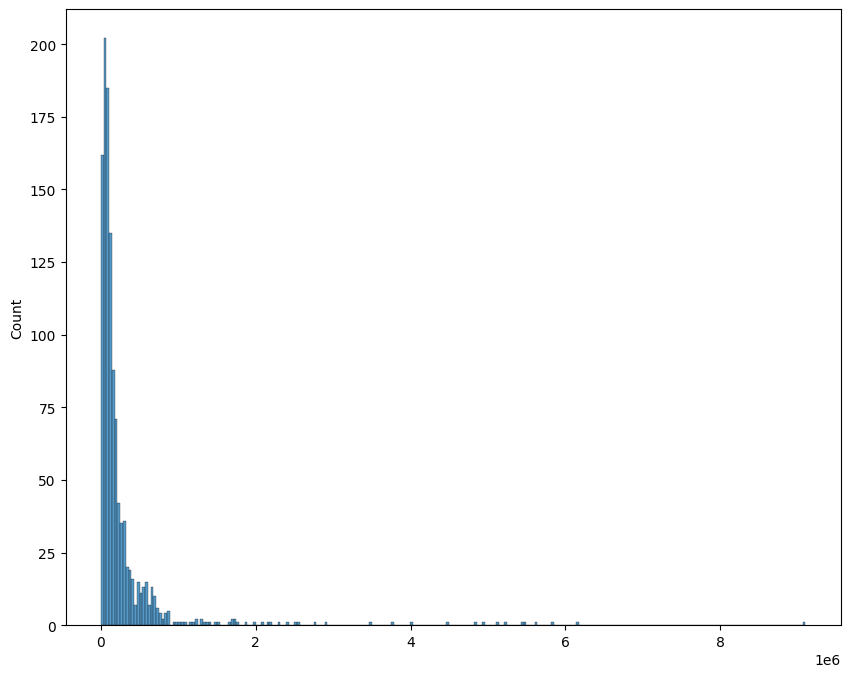

In [12]:
sns.histplot(pc)
plt.plot()

In [13]:
# Plot do Preço Base vs Preço Contratual para ver diferenças entre ambos para um mesmo contrato
df = contratos(cpub).iloc[:,[2,18]]
df = df.rename(columns={2: 'PrecoBase', 18:'PrecoContratual'})
df = df.replace('None',0).astype('float')

/home/francisco/MECAD/COMP/comp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/francisco/MECAD/COMP/comp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/francisco/MECAD/COMP/comp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/francisco/MECAD/COMP/comp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. 

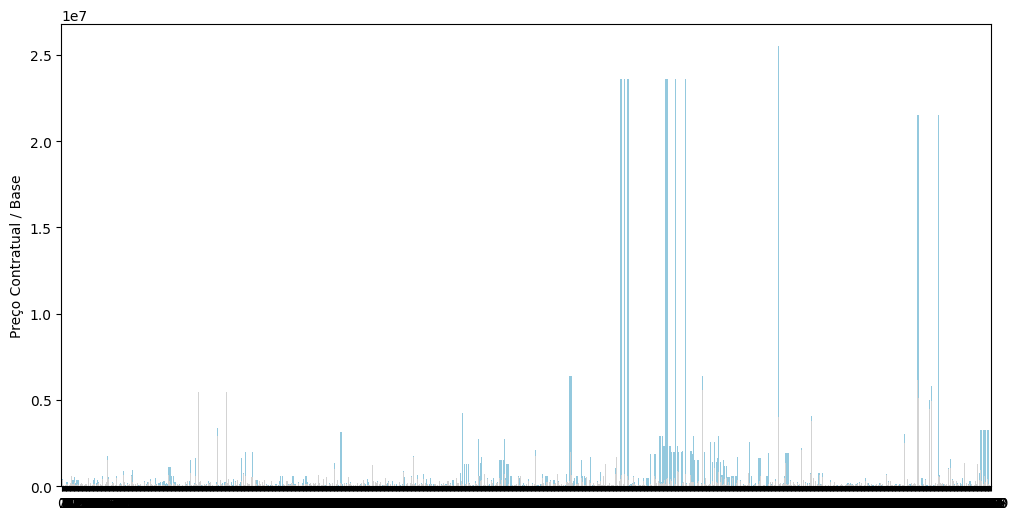

In [14]:
plt.figure(figsize=(12,6))
sns.barplot(x = df.index, y = df.PrecoBase, color = 'skyblue')
sns.barplot(x = df.index, y = df.PrecoContratual, color = 'lightgray', fill=0.1)
plt.ylabel('Preço Contratual / Base')
plt.show()

/home/francisco/MECAD/COMP/comp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/francisco/MECAD/COMP/comp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/francisco/MECAD/COMP/comp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/francisco/MECAD/COMP/comp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. 

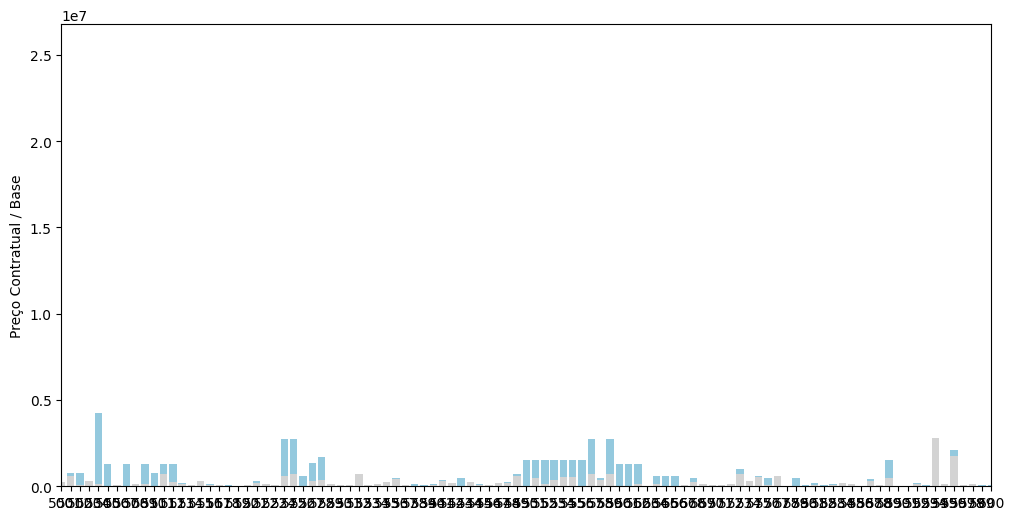

In [15]:
plt.figure(figsize=(12,6))
sns.barplot(x = df.index, y = df.PrecoBase, color = 'skyblue')
sns.barplot(x = df.index, y = df.PrecoContratual, color = 'lightgray', fill=0.1)
plt.ylabel('Preço Contratual / Base')
plt.xlim(500,600)
plt.show()

/tmp/ipykernel_89372/84178919.py:1: RuntimeWarning: divide by zero encountered in divide
  sns.boxplot(pb/pc)
/tmp/ipykernel_89372/84178919.py:1: RuntimeWarning: invalid value encountered in divide
  sns.boxplot(pb/pc)


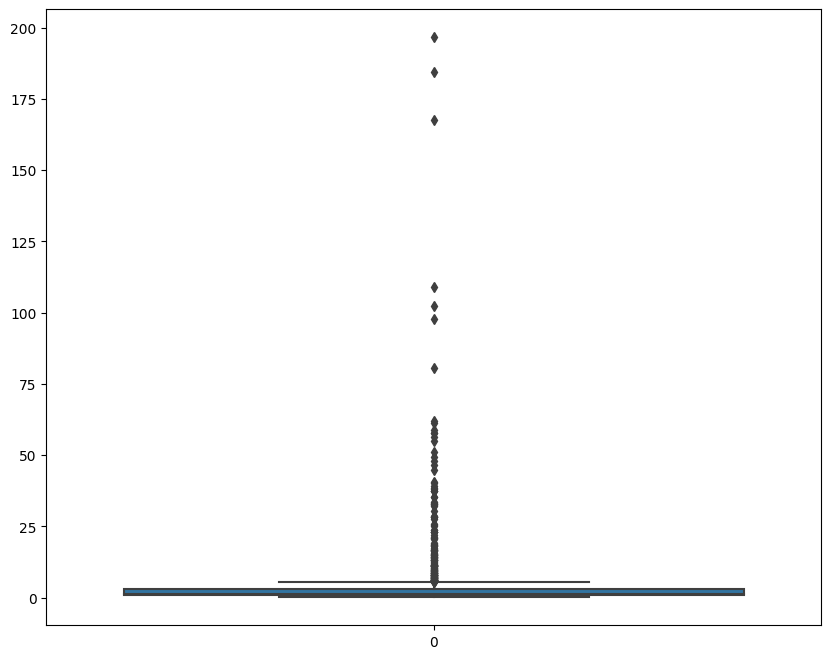

In [16]:
sns.boxplot(pb/pc)
plt.show()

/tmp/ipykernel_89372/3234519312.py:1: RuntimeWarning: divide by zero encountered in divide
  sns.histplot(pb/pc)
/tmp/ipykernel_89372/3234519312.py:1: RuntimeWarning: invalid value encountered in divide
  sns.histplot(pb/pc)
/home/francisco/MECAD/COMP/comp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/francisco/MECAD/COMP/comp/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


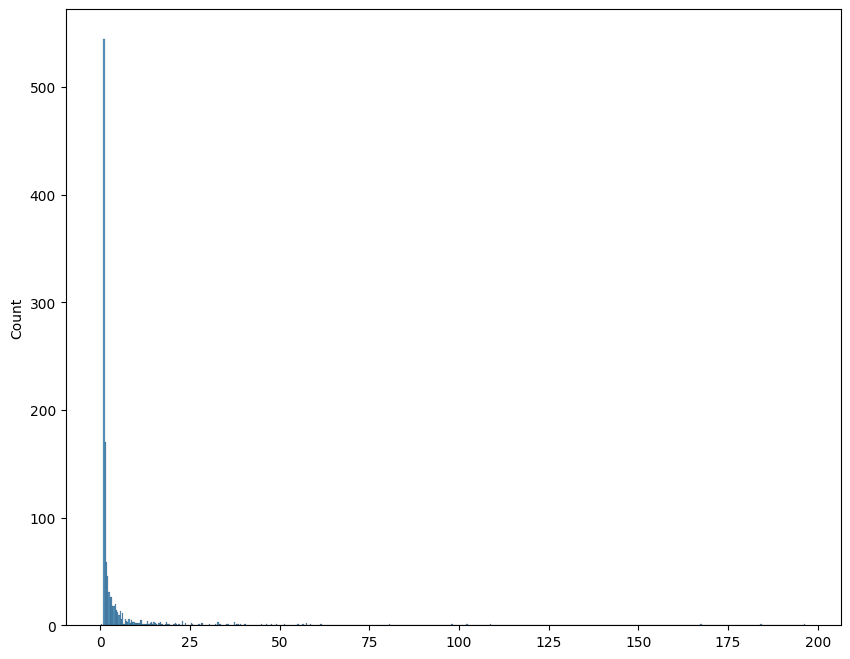

In [17]:
sns.histplot(pb/pc)
plt.show()

## Tratamento dos lotes

In [18]:
# Índice com preço contratual nulo
np.where(pc == 0)

(array([410, 766]),)

In [19]:
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

(np.round(pb/pc, 4))

/tmp/ipykernel_27817/2437271471.py:4: RuntimeWarning: divide by zero encountered in divide
  (np.round(pb/pc, 4))
/tmp/ipykernel_27817/2437271471.py:4: RuntimeWarning: invalid value encountered in divide
  (np.round(pb/pc, 4))


array([  1.111,   1.107,   1.   ,   1.   ,   1.875,   1.349,   1.669,
         2.137,   1.   ,   1.228,   1.   ,   1.006,   1.   ,   1.015,
         2.644,   2.993,   2.215,   2.426,   2.664,   4.763,   3.286,
         7.   ,   1.022,   1.302,   1.008,   1.189,   1.   ,   1.001,
         2.122,   1.   ,   1.   ,   1.064,   1.108,   2.   ,   1.049,
         1.019,   1.004,   1.285,   1.174,   1.188,   2.808,   4.707,
         4.181,   2.162,   2.637,   3.026,   1.307,   1.223,   1.4  ,
         1.229,   1.681,   1.4  ,   2.098,   1.25 ,   1.002,   1.   ,
         1.125,   1.   ,   1.152,   1.378,   1.006,   1.363,   1.491,
         2.015,   1.146,   1.061,   1.391,   2.679,   1.022,   1.254,
         1.053,   1.32 ,   1.003,   1.13 ,   3.768,   1.004,   2.348,
        11.602,   1.286,   1.04 ,   1.27 ,   1.035,  28.188,   1.444,
         1.   ,   1.001,   1.323,   1.006,   1.085,   4.397,   1.   ,
         1.046,   1.465,   1.   ,   7.157,   1.   ,   1.   ,   2.041,
         1.009,   1.

***

<br>

<br>

Verificar a situação em que o preco base é muito maior do que o preço contratual

1. pegar no maior valor do rácio pb/pc
2. verificar pb e pc e verificar rácio
4. obter id e verificar que bate certo usando o função contrato()
5. obter o número de anúncio
6. calcular o número de ocorrências do anúncio
7. obter id's para o mesmo número de anúncio
8. somar precos contratuais
9. comparar novamente com o preço base


**1.**

In [17]:
# Índice do contrato com maior rácio 
rat = pb/pc
rat5 = np.where(rat > 5)[0]

print(np.where(rat > 5), '\n\n', rat[np.where(rat > 5)])

print('\n\n\n Índice do maior rácio :', np.where(rat > 30)[0])

(array([ 21,  77,  82,  94, 124, 126, 127, 137, 138, 139, 140, 150, 203,
       213, 216, 225, 226, 246, 261, 263, 275, 276, 278, 292, 305, 306,
       307, 315, 321, 351, 352, 385, 397, 403, 409, 420, 430, 446, 455,
       458, 462, 465, 499, 500, 504, 506, 507, 508, 509, 510, 513, 522,
       532, 533, 534, 536, 537, 541, 548, 549, 550, 552, 553, 554, 556,
       557, 558, 561, 562, 563, 565, 566, 568, 569, 576, 577, 581, 585,
       588, 590, 591, 592, 596, 597, 598, 599, 604, 605, 612, 613, 619,
       620, 621, 623, 624, 625, 627, 629, 634, 636, 637, 639, 641, 642,
       643, 644, 652, 661, 662, 663, 664, 673, 674, 676, 683, 684, 685,
       698, 706, 708, 709, 710, 721, 748, 754, 813, 816, 817, 864, 877,
       878, 879, 884, 899, 929, 939, 953, 956, 957, 958, 959, 960, 961,
       962]),) 

 [  7.     11.602  28.188   7.157   5.699   7.143   5.492   8.593   7.996
  13.382   5.375  16.608   8.62    6.05   11.177   7.779   5.73    9.293
  40.503   5.055  16.608  28.361  37.36   1

/tmp/ipykernel_137504/2939907773.py:2: RuntimeWarning: divide by zero encountered in divide
  rat = pb/pc
/tmp/ipykernel_137504/2939907773.py:2: RuntimeWarning: invalid value encountered in divide
  rat = pb/pc


**2.**

In [18]:
i = 131
pb[i],pc[i], pb[i]/pc[i]

(136382.4, 36571.92, 3.729156139464376)

**3.**

In [19]:
j = (cpub[i])[0]

Cc = contrato(j)
Cc

""


**4**

In [20]:
n_anuncio = Cc.iloc[:,1][0]
n_anuncio

IndexError: single positional indexer is out-of-bounds

**5.**

In [ ]:
np.where(cp.NrAnuncio == n_anuncio) 

In [ ]:
contrato(cpub[131])

In [ ]:
contrato(cpub[156])

## Demonstração

In [18]:
# Datas de Publicação mais frequentes
print( cp.DataPub.apply(pd.to_datetime).dt.date.value_counts())

DataPub
2022-12-16    35
2023-09-07    15
2023-07-03    12
2023-06-28    12
2023-04-05    12
              ..
2023-02-02     1
2023-01-31     1
2023-01-27     1
2022-09-27     1
2023-05-22     1
Name: count, Length: 314, dtype: int64


In [19]:
# Filtrar contratos publicados no dia 2023-09-07
demo = cp.loc[cp['DataPub'] == '2023-09-07'].reset_index()
h(demo)

index,ID,NrAnuncio,PrecoBase,Prazo,4,5,6,7,8,9,10,11,12,13,14,15,DataPub,DataCel,PrecoContratual,19,Adjudicante,21,Adjudicatária,EntConcorrentes,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
300,10228484,5330/2023,546000.00,30,False,6427159,12870832,2023-04-03,66,2,False,False,https://dre.pt/application/file/211344046,Anúncio de procedimento,Concurso público,"Aquisição de serviços para suporte a aplicações SAP, em regime de bolsa de horas: Lote 1 - Aquisição de bolsa de horas para suporte aos módulos de FI/CO em aplicações SAP Lote 2 - Aquisição de bolsa de horas para suporte aos módulos de Logística em aplicações SAP",2023-09-07,2023-08-25,232500.00,1096,"Imprensa Nacional - Casa da Moeda, S. A. (500792887)(https://www.base.gov.pt/Base4/pt/detalhe/?type=entidades&id=1)","Artigo 20.º, n.º 1, alínea a) do Código dos Contratos Públicos","HCCM CONSULTING, S.A. (503470120)(https://www.base.gov.pt/Base4/pt/detalhe/?type=entidades&id=26510)","Brighten SA (504106686)|||AMT Consulting (507750934)|||Amazon Informática, Lda (516411810)",https://www.base.gov.pt/Base4/pt/detalhe/?type=anuncios&id=344042,https://www.acingov.pt/acingovprod/2/zonaPublica/zona_publica_c/donwloadProcedurePiece/NjI0NDMx,https://www.base.gov.pt/Base4/pt/resultados/?type=doc_documentos&id=2053876&ext=.pdf,false,72262000-9,False,None,None,False,False,None,False,None,False,Aquisição de serviços,Serviços de desenvolvimento de software,Principal,232500.0,"Aquisição de serviços para suporte a aplicações SAP, em regime de bolsa de horas: Lote 1 - Aquisição de bolsa de horas para suporte aos módulos de FI/CO em aplicações SAP Lote 2 - Aquisição de bolsa de horas para suporte aos módulos de Logística em aplicações SAP",Não aplicável,None,Portugal,Não aplicável.,Não aplicável.,None,False,False,None,None,False,None,True,None,"Código dos Contratos Públicos (DL111-B/2017) e Lei n.º 30/2021, de 21.05",None,None,1701118526
301,10228504,5330/2023,546000.00,30,False,6427159,12870832,2023-04-03,66,2,False,False,https://dre.pt/application/file/211344046,Anúncio de procedimento,Concurso público,"Aquisição de serviços para suporte a aplicações SAP, em regime de bolsa de horas: Lote 1 - Aquisição de bolsa de horas para suporte aos módulos de FI/CO em aplicações SAP Lote 2 - Aquisição de bolsa de horas para suporte aos módulos de Logística em aplicações SAP",2023-09-07,2023-08-25,232500.00,1096,"Imprensa Nacional - Casa da Moeda, S. A. (500792887)(https://www.base.gov.pt/Base4/pt/detalhe/?type=entidades&id=1)","Artigo 20.º, n.º 1, alínea a) do Código dos Contratos Públicos","HCCM CONSULTING, S.A. (503470120)(https://www.base.gov.pt/Base4/pt/detalhe/?type=entidades&id=26510)","Amazon Informática, Lda (516411810)|||Brighten SA (504106686)|||AMT Consulting (507750934)",https://www.base.gov.pt/Base4/pt/detalhe/?type=anuncios&id=344042,https://www.acingov.pt/acingovprod/2/zonaPublica/zona_publica_c/donwloadProcedurePiece/NjI0NDMx,https://www.base.gov.pt/Base4/pt/resultados/?type=doc_documentos&id=2053879&ext=.pdf,false,72262000-9,False,None,None,False,False,None,False,None,False,Aquisição de serviços,Serviços de desenvolvimento de software,Principal,232500.0,"Aquisição de serviços para suporte a aplicações SAP, em regime de bolsa de horas: Lote 1 - Aquisição de bolsa de horas para suporte aos módulos de FI/CO em aplicações SAP Lote 2 - Aquisição de bolsa de horas para suporte aos módulos de Logística em aplicações SAP",Não aplicável,None,Portugal,Não aplicável.,Não aplicável.,None,False,False,None,None,False,None,True,None,"Código dos Contratos Públicos (DL111-B/2017) e Lei n.º 30/2021, de 21.05",None,None,1701118507
302,10228718,7550/2023,26377.20,6,False,6493396,13003405,2023-05-11,91,2,False,False,https://dre.pt/application/file/212986817,Anúncio de procedimento,Concurso público,2023002388 - AQUISIÇÃO DE ORACLE DATABASE STANDARD EDITION PARA O HOSPITAL DAS FORÇAS ARMADAS – POLO DE LISBOA,2023-09-07,2023-06-15,26337.20,366,

In [20]:
indices = tuple(demo.ID)
preco_b = np.array(demo.PrecoBase.astype(float))
preco_c = np.array(demo.PrecoContratual.astype(float))

flags = redflag(preco_b, preco_c, 0.1, indices, 10, demo)
flags

(('10228718',), ('10230172',), ('10230712',), ('10230715',))

In [21]:
demo.loc[demo.ID.isin(['10230715', '10230712', '10230172', '10228718']), ['ID', 'NrAnuncio', 'PrecoBase', 'PrecoContratual']]

,ID,NrAnuncio,PrecoBase,PrecoContratual
2,10228718,7550/2023,26377.20,26337.20
5,10230172,8223/2023,3139486.56,150184.80
13,10230712,7712/2023,202642.00,202606.44
14,10230715,11518/2023,77240.00,71725.00


In [22]:
demo1 = demo.loc[:,['ID', 'NrAnuncio', 'PrecoBase', 'PrecoContratual']]

demo1['Diferença'] = 0
demo1['Diferença'] = preco_b - preco_c


demo1['Dif %'] = ''
demo1['Dif %'] = difrel(preco_b, preco_c).round(3)


# Criar nova coluna para as flags com valor inicial 0 para todos os contratos
demo1['Flag'] = 0  
demo1.loc[demo1['ID'].isin(['10230715', '10230712', '10230172', '10228718']), 'Flag'] = 1

demo1

,ID,NrAnuncio,PrecoBase,PrecoContratual,Diferença,Dif %,Flag
0,10228484,5330/2023,546000.00,232500.00,313500.00,57.418,0
1,10228504,5330/2023,546000.00,232500.00,313500.00,57.418,0
2,10228718,7550/2023,26377.20,26337.20,40.00,0.152,1
3,10228788,7587/2023,183260.00,73541.16,109718.84,59.871,0
4,10229934,5840/2023,410532.56,83085.88,327446.68,79.761,0
5,10230172,8223/2023,3139486.56,150184.80,2989301.76,95.216,1
6,10230212,867/2023,598474.80,74844.00,523630.80,87.494,0
7,10230288,867/2023,598474.80,111342.00,487132.80,81.396,0
8,10230326,867/2023,598474.80,129729.60,468745.20,78.323,0
9,10230493,6846/2023,266976.00,116046.00,150930.00,56.533,0


In [23]:
percentage = flagconti(tuple(demo1.ID))

demo1['FlagCont'] = ''
demo1['FlagCont'] = percentage[3].round(3)

demo1

,ID,NrAnuncio,PrecoBase,PrecoContratual,Diferença,Dif %,Flag,FlagCont
0,10228484,5330/2023,546000.00,232500.00,313500.00,57.418,0,0.114
1,10228504,5330/2023,546000.00,232500.00,313500.00,57.418,0,0.114
2,10228718,7550/2023,26377.20,26337.20,40.00,0.152,1,0.738
3,10228788,7587/2023,183260.00,73541.16,109718.84,59.871,0,0.154
4,10229934,5840/2023,410532.56,83085.88,327446.68,79.761,0,0.530
5,10230172,8223/2023,3139486.56,150184.80,2989301.76,95.216,1,0.881
6,10230212,867/2023,598474.80,74844.00,523630.80,87.494,0,0.699
7,10230288,867/2023,598474.80,111342.00,487132.80,81.396,0,0.564
8,10230326,867/2023,598474.80,129729.60,468745.20,78.323,0,0.500
9,10230493,6846/2023,266976.00,116046.00,150930.00,56.533,0,0.100


## Valor Flag Contínuo

In [29]:
Pb = np.array(cp.PrecoBase.replace('None',0).astype(float))
Pc = np.array(cp.PrecoContratual.replace('None',0).astype(float))

(Pb[0] - Pc[0])/Pb[0] * 100

10.00455

In [30]:
Xx = np.where(difrel(Pb,Pc)/100 > 1)

print(Pb[Xx], Pc[Xx])

[12000.] [100000.]


/home/francisco/MECAD/2º Ano/Estágio/forcera/scripts/scripts_py/functions.py:641: RuntimeWarning: invalid value encountered in divide
  return abs(a-b)/a * 100


In [31]:
difrel(Pb[Xx], Pc[Xx])

array([733.33333333])

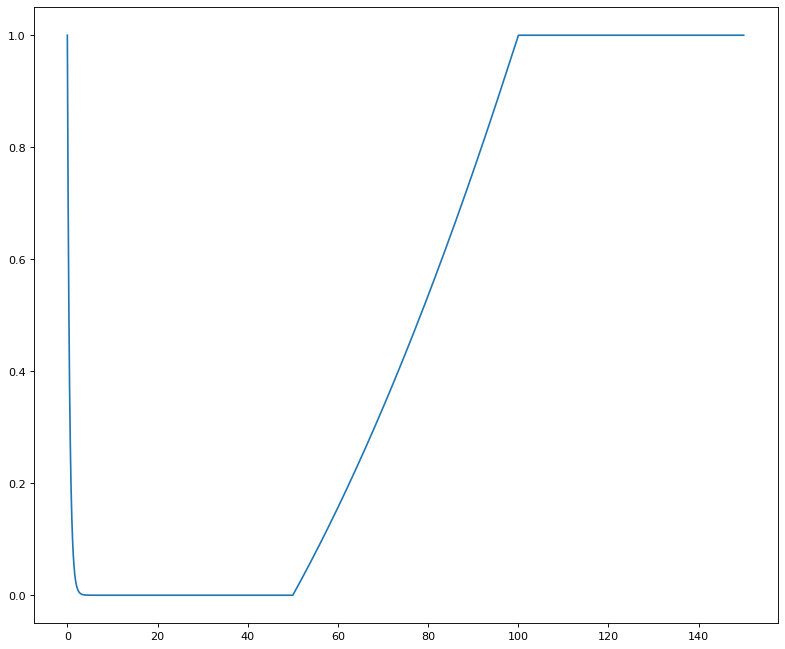

In [32]:
from matplotlib.pyplot import figure

x = np.linspace(0,150,10000)
figure(num=None, figsize=(12,10), dpi=80, facecolor='w', edgecolor='k')

plt.plot(x,fun(x))
plt.show()

# Análise Prazo de Candidatura

In [24]:
flags1 = prazo(cp)
flags1

('10010576',
 '10041743',
 '10063214',
 '10096080',
 '10103775',
 '10118819',
 '10271100',
 '10318582',
 '10324626',
 '10333181',
 '10345354',
 '10349581',
 '9399551',
 '9426666',
 '9438902',
 '9484310',
 '9565472',
 '9566187',
 '9577292',
 '9629534',
 '9633086',
 '9633292',
 '9634039',
 '9636192',
 '9660715',
 '9664681',
 '9747980',
 '9749656',
 '9796559',
 '9800786',
 '9811823',
 '9823998',
 '9824923',
 '9825462',
 '9827137',
 '9895495',
 '9901639',
 '9915178',
 '9953348',
 '9986637',
 '9990308',
 '9995605')

In [25]:
# Os elementos de prazo que aparecem vazios correspondem a entradas não preenchidas aquando do preenchimento no basegov
df_prazo = cp.loc[cp.ID.isin(prazo(cp)), ['ID', 'NrAnuncio', 'DataPub','DataCel','Prazo']]
df_prazo

,ID,NrAnuncio,DataPub,DataCel,Prazo
9,10010576,212/2023,2023-05-24,2023-05-08,
26,10041743,296/2023,2023-05-30,2023-05-29,
52,10063214,154/2022,2023-06-07,2022-05-02,
110,10096080,1119/2023,2023-06-28,2023-06-27,4
144,10103775,1090/2023,2023-07-03,2023-06-29,5
170,10118819,478/2023,2023-07-12,2023-07-03,4
366,10271100,491/2023,2023-10-02,2023-09-08,
437,10318582,1195/2022,2023-10-30,2022-12-20,3
442,10324626,15934/2023,2023-11-03,2023-10-25,3
450,10333181,1253/2023,2023-11-09,2023-07-07,5


In [26]:
# f : conjunto de todas as flags disparadas quando é comparado o preço base com o preço contratual
X = tuple(sub[0] for sub in f)
X = np.array(tuple(int(item) for item in X))

# Verificar quais os indices onde ocorrem flags para prazos de candidaturas inferiores a 6 dias
Y = np.array(tuple(int(item) for item in prazo(cp)))

# Queremos ver onde há overlap de flags
xy = np.where(np.isin(Y,X))[0]
xy

array([ 1,  3,  4,  5,  6,  7,  8, 10, 13, 14, 15, 16, 20, 21, 22, 23, 24,
       25, 26, 27, 28, 30, 31, 35, 36, 38, 39, 40, 41])

In [27]:
df_prazo['PrecoBase'] = (cp.loc[cp.ID.isin(flags1),'PrecoBase']).replace('None',0).astype(float)
df_prazo['PrecoContratual'] = cp.loc[cp.ID.isin(flags1),'PrecoContratual'].replace('None',0).astype(float)
df_prazo['Diferença'] = df_prazo.PrecoBase - df_prazo.PrecoContratual
df_prazo['DifPercentual ( % )'] = difrel(df_prazo.PrecoBase, df_prazo.PrecoContratual).round(1)


df_prazo['Flag'] = ''
df_prazo.loc[df_prazo.index[xy],'Flag'] = 1


df_prazo['FlagCont'] = ''
perc = flagconti(tuple(df_prazo.ID))[3].round(3)
df_prazo['FlagCont'] = perc


df_prazo

,ID,NrAnuncio,DataPub,DataCel,Prazo,PrecoBase,PrecoContratual,Diferença,DifPercentual ( % ),Flag,FlagCont
9,10010576,212/2023,2023-05-24,2023-05-08,,211504.32,172224.00,39280.32,18.6,,0.000
26,10041743,296/2023,2023-05-30,2023-05-29,,137786.00,137785.00,1.00,0.0,1,0.999
52,10063214,154/2022,2023-06-07,2022-05-02,,189280.00,90228.48,99051.52,52.3,,0.035
110,10096080,1119/2023,2023-06-28,2023-06-27,4,149040.00,149025.00,15.00,0.0,1,0.980
144,10103775,1090/2023,2023-07-03,2023-06-29,5,109251.00,105247.66,4003.34,3.7,1,0.001
170,10118819,478/2023,2023-07-12,2023-07-03,4,121200.00,111744.00,9456.00,7.8,1,0.000
366,10271100,491/2023,2023-10-02,2023-09-08,,32880.00,32880.00,0.00,0.0,1,1.000
437,10318582,1195/2022,2023-10-30,2022-12-20,3,203000.00,201788.42,1211.58,0.6,1,0.303
442,10324626,15934/2023,2023-11-03,2023-10-25,3,150151.14,150436.69,-285.55,0.2,1,0.684
450,10333181,1253/2023,2023-11-09,2023-07-07,5,139000.00,113829.55,25170.45,18.1,,0.000


In [28]:
header = pd.MultiIndex.from_tuples([
    ('Flag 1', 'ID'), ('Flag 1', 'NrAnuncio'), ('Flag 1', 'DataPub'), ('Flag 1', 'DataCel'), ('Flag 1', 'Prazo'),
    ('Flag 2', 'PrecoBase'), ('Flag 2', 'PrecoContratual'), ('Flag 2', 'Diferença') ,('Flag 2', 'DifPercentual ( % )'), ('Flag 2', 'Flag'), ('Flag 2', 'FlagCont')
])


df_prazo.columns = header

#styled_df = df_prazo.style.set_properties(**{
#    'border': '1px solid gray',  # Sets border style and color
#    'text-align': 'left',       # Aligns text in cells
#    'width': '150px',             # Sets width for each cell
#    })

df_prazo

Flag 1                                              Flag 2  \
            ID   NrAnuncio    DataPub    DataCel Prazo   PrecoBase   
9     10010576    212/2023 2023-05-24 2023-05-08         211504.32   
26    10041743    296/2023 2023-05-30 2023-05-29         137786.00   
52    10063214    154/2022 2023-06-07 2022-05-02         189280.00   
110   10096080   1119/2023 2023-06-28 2023-06-27     4   149040.00   
144   10103775   1090/2023 2023-07-03 2023-06-29     5   109251.00   
170   10118819    478/2023 2023-07-12 2023-07-03     4   121200.00   
366   10271100    491/2023 2023-10-02 2023-09-08          32880.00   
437   10318582   1195/2022 2023-10-30 2022-12-20     3   203000.00   
442   10324626  15934/2023 2023-11-03 2023-10-25     3   150151.14   
450   10333181   1253/2023 2023-11-09 2023-07-07     5   139000.00   
476   10345354   2205/2023 2023-11-16 2023-11-16     4    32756.00   
478   10349581   2260/2023 2023-11-20 2023-11-15     3   139000.00   
508    9399551   1350/2022 2022-08-04 2022-08-04     2   136811.76   
572    9426666    424/2022 2022-08-29 2022-08-28         138335.00   
585    9438902    451/2022 2022-09-07 2022-09-06         140000.00   
631    9484310    489/2022 2022-10-06 2022-09-23          74897.80   
720    9565472     49/2019 2022-11-18 2018-04-16  -393   123830.00   
722    9566187    581/2022 2022-11-18 2022-11-18          65900.00   
730    9577292   1236/2022 2022-11-23 2022-11-15     1   210000.00   
857    9629534   1837/2022 2022-12-20 2022-12-14     3    75880.00   
860    9633086    643/2022 2022-12-22 2022-12-21          74900.00   
861    9633292    644/2022 2022-12-22 2022-12-21          74988.00   
863    9634039    645/2022 2022-12-22 2022-12-21          73728.00   
874    9636192    647/2022 2022-12-26 2022-12-21          35410.00   
884    9660715   2452/2022 2022-12-29 2022-12-28          74976.00   
886    9664681    662/2022 2023-01-02 2022-12-29          74993.10   
951    9747980     14/2023 2023-02-01 2023-01-27     4   153000.00   
954    9749656   1996/2022 2023-02-02 2023-02-01     5    76500.00   
965    9796559     20/2023 2023-02-12 2023-02-08          61900.00   
976    9800786   2457/2022 2023-02-16 2023-02-02     2    74500.00   
981    9811823     12/2023 2023-02-20 2023-01-31         110905.50   
986    9823998     31/2023 2023-02-27 2023-02-14          98800.00   
988    9824923     48/2023 2023-02-27 2023-02-16         192000.00   
989    9825462     48/2023 2023-02-27 2023-02-16         192000.00   
994    9827137     90/2023 2023-02-28 2023-02-23         121932.00   
1061   9895495   2016/2022 2023-03-29 2023-03-28     2   200000.00   
1066   9901639   2100/2022 2023-03-31 2023-03-14     5  1710720.00   
1080   9915178   2307/2022 2023-04-05 2023-04-04     4    60000.00   
1120   9953348    219/2023 2023-04-28 2023-04-28         124256.00   
1148   9986637    247/2023 2023-05-12 2023-05-10          55000.00   
1153   9990308    220/2023 2023-05-16 2023-05-15          74988.00   
1159   9995605    459/2023 2023-05-18 2023-05-17     5   770480.00   

                                                                   
     PrecoContratual  Diferença DifPercentual ( % ) Flag FlagCont  
9          172224.00   39280.32                18.6         0.000  
26         137785.00       1.00                 0.0    1    0.999  
52          90228.48   99051.52                52.3         0.035  
110        149025.00      15.00                 0.0    1    0.980  
144        105247.66    4003.34                 3.7    1    0.001  
170        111744.00    9456.00                 7.8    1    0.000  
366         32880.00       0.00                 0.0    1    1.000  
437        201788.42    1211.58                 0.6    1    0.303  
442        150436.69    -285.55                 0.2    1    0.684  
450        113829.55   25170.45                18.1         0.000  
476         32756.00       0.00                 0.0    1    1.000  
478        102419.10   36580.90            

# R018 : Número de Entidades Concorrentes

<StemContainer object of 3 artists>

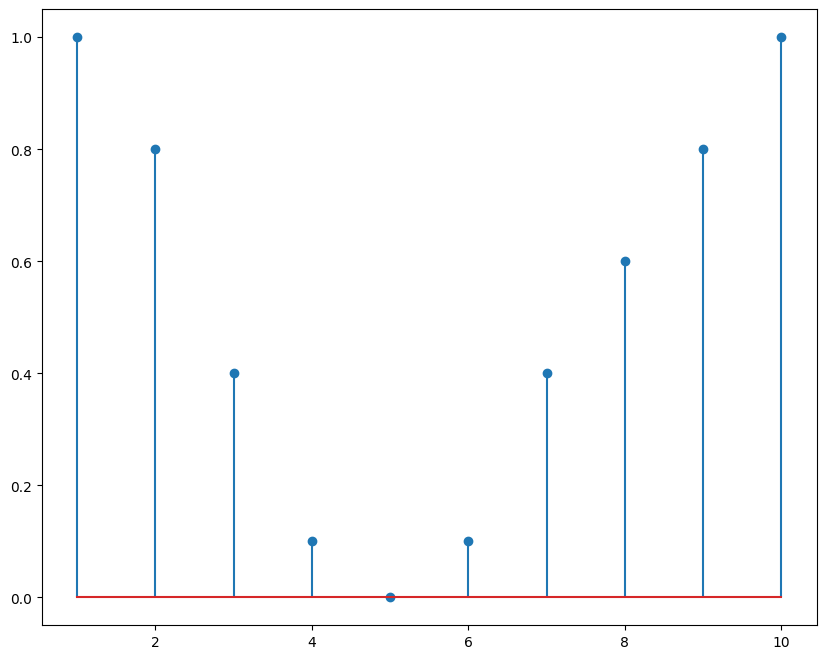

In [33]:
xd = np.arange(1,11,1)
yd = np.array([1,0.8,0.4,0.1,0,0.1,0.4,0.6,0.8,1])

plt.stem(xd,yd)

In [34]:
def nec_classifier(n):
    """
    Número de Entidades Concorrentes : Classificador
    Consoante o número de entidades concorrentes, atribuir um valor entre 0 e 1

    Se o número de entidades concorrentes for superior a 10 empresas é atribuído, automaticamente, um valor de flag 1
    Para valores entre 1 e 10, é atribuído um valor de yd

    Esta função só funciona para um valor de cada vez
    
    Parâmetros:
        n : número de entidades concorrentes para um determinado concurso

    Return:
        float : valor entre 0 e 1
    """

    xd = np.arange(1,11,1)
    yd = np.array([1,0.8,0.4,0.1,0,0.1,0.4,0.6,0.8,1])
        
    if n > 10 :
        return 1

    elif n in xd : 
        return yd[np.where(n == xd)][0]

In [86]:
def nr_entidades(Id):
    """
    Função que, dado o id de um contrato, retorna uma lista com as entidades concorrentes. Desta forma, podemos calcular o número de entidades concorrentes utilizando o comando len()
    Se se der como input apenas um contrato - o id deste irá ter length = 8 visto que cada ID é composto por 8 algarismos - irá ser realizado no primeiro ramo do ciclo if-else
    Se se der um tuplo de ID's irá ser calculado no segundo ramo do ciclo e será retornada uma lista de listas

    Parâmetros:
        Id : id do contrato

    return:
        result : lista com a entidades concorrentes
    """

    if len(Id) == 8:
    
        cur = conn.cursor()
        cur.execute('''
                    SELECT entidades_concorrentes
                    FROM "contratos"
                    WHERE id = %s;''', (Id,))
        
        data = cur.fetchall()
        result = data[0][0].split('|||')
    
        return result

    
    else:
        
        cur = conn.cursor()
        cur.execute('''
                    SELECT entidades_concorrentes
                    FROM "contratos"
                    WHERE id IN %s; ''', (tuple(Id),))
            
        data = cur.fetchall()
        
        n = len(data)
        r = [] 
        result = []
        
        for i in range(n):
            r = data[i][0].split('|||')
            result.append(r)
            
        return result

In [36]:
def redflag3(Id):
    """
    """
    
    n = nr_entidades(Id)
    df = pd.DataFrame({'ID':Id})
    df['NrEntConc'] = ''
    df['FlagNEC'] = ''
    
    for i,j in enumerate(n):
        m = len(j)
        df.NrEntConc[i] = m
        df.FlagNEC[i] = nec_classifier(m)
        
    return df

In [37]:
h(redflag3(cpub))

ID,NrEntConc,FlagNEC
10001448,5,0.0
10004158,1,1.0
10005180,1,1.0
10005452,1,1.0
10007696,7,0.4
10007956,2,0.8
10009799,6,0.1
10010325,11,1
10010396,1,1.0
10010576,1,1.0


# Junção das 3 flags construídas

In [42]:
ndf = cp.loc[:,['ID','NrAnuncio','PrecoBase','PrecoContratual']]

ndf.PrecoBase = ndf.PrecoBase.replace('None',0).astype(float)
ndf.PrecoContratual = ndf.PrecoContratual.replace('None',0).astype(float)

ndf.loc[:,'Diferença'] = ndf.PrecoBase - ndf.PrecoContratual
ndf.loc[:,'DifPercentual'] = difrel(ndf.PrecoBase, ndf.PrecoContratual).round(2)

ff = tuple(item[0] for item in f)

ndf.loc[:,'Flag'] = 0
ndf.loc[ndf.ID.isin(ff) ,'Flag'] = 1

ndf['FlagC1'] = ''
perc = flagconti(tuple(ndf.ID))[3].round(3)
ndf['FlagC1'] = perc

ndf.head(15)

/home/francisco/MECAD/2º Ano/Estágio/forcera/scripts/scripts_py/functions.py:641: RuntimeWarning: invalid value encountered in divide
  return abs(a-b)/a * 100


,ID,NrAnuncio,PrecoBase,PrecoContratual,Diferença,DifPercentual,Flag,FlagC1
0,10001448,4840/2023,20000.00,17999.09,2000.91,10.00,0,0.000
1,10004158,4270/2023,409500.00,369980.00,39520.00,9.65,1,0.000
2,10005180,6923/2023,102200.00,102200.00,0.00,0.00,1,1.000
3,10005452,6114/2023,16000.00,16000.00,0.00,0.00,1,1.000
4,10007696,17004/2022,4118400.00,2196480.00,1921920.00,46.67,0,0.000
5,10007956,5712/2023,77672.00,57600.00,20072.00,25.84,0,0.000
6,10009799,2052/2023,232320.00,139159.68,93160.32,40.10,0,0.000
7,10010325,2054/2023,242000.00,113256.00,128744.00,53.20,0,0.048
8,10010396,3280/2023,255000.00,255000.00,0.00,0.00,1,1.000
9,10010576,212/2023,211504.32,172224.00,39280.32,18.57,0,0.000


In [43]:
ndf['PrazoCand'] = cp.loc[:,'Prazo']

ndf['PrazoFlag'] = 0
ndf.loc[ndf.ID.isin(flags1), ['PrazoFlag']] = 1

ndf['FlagC2'] = ''

ndf

,ID,NrAnuncio,PrecoBase,PrecoContratual,Diferença,DifPercentual,Flag,FlagC1,PrazoCand,PrazoFlag,FlagC2
0,10001448,4840/2023,20000.00,17999.09,2000.91,10.00,0,0.000,6,0,
1,10004158,4270/2023,409500.00,369980.00,39520.00,9.65,1,0.000,39,0,
2,10005180,6923/2023,102200.00,102200.00,0.00,0.00,1,1.000,6,0,
3,10005452,6114/2023,16000.00,16000.00,0.00,0.00,1,1.000,6,0,
4,10007696,17004/2022,4118400.00,2196480.00,1921920.00,46.67,0,0.000,30,0,
...,...,...,...,...,...,...,...,...,...,...,...
1165,9996671,12066/2022,3264200.98,406604.94,2857596.04,87.54,0,0.700,30,0,
1166,9996682,12066/2022,3264200.98,154500.19,3109700.79,95.27,0,0.882,30,0,
1167,9997025,3618/2023,74997.91,74977.91,20.00,0.03,1,0.948,6,0,
1168,9997144,2440/2022,334000.00,166800.00,167200.00,50.06,0,0.001,11,0,


In [44]:
nec = redflag3(cpub)
n1 = nec.NrEntConc
n2 = nec.FlagNEC

In [45]:
ndf['NEC'] = n1

ndf['FlagC3'] = ''
ndf.FlagC3 = n2
ndf

,ID,NrAnuncio,PrecoBase,PrecoContratual,Diferença,DifPercentual,Flag,FlagC1,PrazoCand,PrazoFlag,FlagC2,NEC,FlagC3
0,10001448,4840/2023,20000.00,17999.09,2000.91,10.00,0,0.000,6,0,,5,0.0
1,10004158,4270/2023,409500.00,369980.00,39520.00,9.65,1,0.000,39,0,,1,1.0
2,10005180,6923/2023,102200.00,102200.00,0.00,0.00,1,1.000,6,0,,1,1.0
3,10005452,6114/2023,16000.00,16000.00,0.00,0.00,1,1.000,6,0,,1,1.0
4,10007696,17004/2022,4118400.00,2196480.00,1921920.00,46.67,0,0.000,30,0,,7,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1165,9996671,12066/2022,3264200.98,406604.94,2857596.04,87.54,0,0.700,30,0,,9,0.8
1166,9996682,12066/2022,3264200.98,154500.19,3109700.79,95.27,0,0.882,30,0,,9,0.8
1167,9997025,3618/2023,74997.91,74977.91,20.00,0.03,1,0.948,6,0,,1,1.0
1168,9997144,2440/2022,334000.00,166800.00,167200.00,50.06,0,0.001,11,0,,8,0.6


# R049 : Determinar número de concursos públicos celebrados por uma determinada entidade num determinado período de tempo 

- [x] Colunas Adjudicante e Ajudicatária : Separar elementos de cada uma das colunas em 3 colunas ( Entidade | URL | NIF )
- [x] Contar número de ocorrências para NIF nos dois casos ( adjudicante e adjudicatária )
- [x] Aplicar passo anterior num intervalo de tempo 

In [46]:
# Separação dos elementos de cada coluna em Entidade-NIF-URL
# O objetivo é contar o número de ocorrências de cada NIF
pattern = r'^(?P<EntidadeAdjudicante>.*?)\s?\((?P<NIF1>[\w\.-]+)\)\((?P<URL1>.*?)\)$'
pattern1 = r'^(?P<EntidadeAdjudicataria>.*?)\s?\((?P<NIF2>[\w\.-]+)\)\((?P<URL2>.*?)\)$'


Df_extracted =  cp['Adjudicante'].str.extract(pattern)
Df_extracted1 = cp['Adjudicatária'].str.extract(pattern1)


# Correr linhas abaixo só uma vez
# Caso contrário está sempre a adicionar à dataframe as mesas colunas
cp = pd.concat([cp, Df_extracted], axis=1)
cp = pd.concat([cp, Df_extracted1], axis=1)

In [47]:
h(cp.head(1))

ID,NrAnuncio,PrecoBase,Prazo,4,5,6,7,8,9,10,11,12,13,14,15,DataPub,DataCel,PrecoContratual,19,Adjudicante,21,Adjudicatária,EntConcorrentes,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,EntidadeAdjudicante,NIF1,URL1,EntidadeAdjudicataria,NIF2,URL2
10001448,4840/2023,20000.00,6,False,6417636,12848310,2023-03-27,61,2,False,False,https://dre.pt/application/file/211056048,Anúncio de procedimento,Concurso público,Aquisição de Licenciamento Microsoft,2023-05-22,2023-05-22,17999.09,366,Centro de Formação Profissional das Pescas e do Mar (FOR-MAR) (508590582)(https://www.base.gov.pt/Base4/pt/detalhe/?type=entidades&id=19),"Artigo 20.º, n.º 1, alínea b) do Código dos Contratos Públicos","VIMAPONTO - Equipamentos e Serviços Informática, S.A. (503063851)(https://www.base.gov.pt/Base4/pt/detalhe/?type=entidades&id=14060)","Exitus, Soluções Tecnológicas, Lda. (509117660)|||INETUM ESPAÑA SA (980079659)|||TCSI Digibéria - Tecnologias de Informação, S.A. (502670355)|||LINKCOM - SISTEMAS DE INFORMAÇÃO SA (505046547)|||KONICA MINOLTA BUSINESS SOLUTIONS PORTUGAL, UNIPESSOAL, LDA (502120070)",https://www.base.gov.pt/Base4/pt/detalhe/?type=anuncios&id=343442,https://community.vortal.biz/PRODPublic/Tendering/OpportunityDetail/Index?noticeUID=PT1.NTC.2325050,https://www.base.gov.pt/Base4/pt/resultados/?type=doc_documentos&id=1999107&ext=.pdf,false,72212218-0,False,pagamento antecipado,None,False,False,2023-09-25,False,None,False,Aquisição de serviços,Serviços de desenvolvimento de software para gestão de licenças,Principal,17999.09,Aquisição de Licenciamento Microsoft,Não aplicável,Cumprimento integral do contrato,"Portugal, Lisboa, Lisboa",Não aplicável.,Não aplicável.,None,False,False,None,None,False,None,True,None,"Código dos Contratos Públicos (DL111-B/2017) e Lei n.º 30/2021, de 21.05",None,17999.09,1700348541,Centro de Formação Profissional das Pescas e do Mar (FOR-MAR),508590582,https://www.base.gov.pt/Base4/pt/detalhe/?type=entidades&id=19,"VIMAPONTO - Equipamentos e Serviços Informática, S.A.",503063851,https://www.base.gov.pt/Base4/pt/detalhe/?type=entidades&id=14060


In [48]:
# Contagem do número de ocorrências para os NIFs de entidades adjudicantes
cp.NIF1.value_counts()

NIF1
509540716    317
508184509     35
504322915     30
510928374     25
510361242     21
            ... 
506037258      1
600038106      1
501378669      1
500746427      1
510786839      1
Name: count, Length: 287, dtype: int64

In [49]:
# Contagem do número de ocorrências para os NIFs de entidades adjudicatárias
cp.NIF2.value_counts()

NIF2
504272179    84
501774360    78
515777048    50
502604751    41
510728189    37
             ..
500433615     1
506465535     1
513154990     1
500221103     1
516584960     1
Name: count, Length: 295, dtype: int64

In [50]:
# Conversão das colunas de data de celebração e publicação em datetime
cp.DataCel = pd.to_datetime(cp.DataCel)
cp.DataPub = pd.to_datetime(cp.DataPub)

In [51]:
# Número de contratos celebrados em 2023
len(cp[cp['DataCel'].dt.year == 2023])

709

In [52]:
# Como há NIFs estrangeiros que contém as letras do país antes do número, temos de comparar strings e não inteiros
cp.NIF1 = cp.NIF1.astype(str)
cp.NIF2 = cp.NIF2.astype(str)

In [53]:
# Número de contratos públicos celebrados por ano
cp['DataCel'].dt.year.value_counts().sort_index(ascending = False)

DataCel
2023    709
2022    448
2021      8
2020      2
2019      1
2018      2
Name: count, dtype: int64

In [54]:
# Número de contratos públicos ganhos em 2023 pela empresa com o NIF abaixo
print(len(cp[(cp['DataCel'].dt.year == 2023) & (cp.NIF2 == '504272179')]))

# Conjunto de contratos públicos ganhos em 2023 pela empresa com o NIF abaixo
cp[(cp['DataCel'].dt.year == 2023) & (cp.NIF2 == '504272179')]

47


,ID,NrAnuncio,PrecoBase,Prazo,4,5,6,7,8,9,...,57,58,59,60,EntidadeAdjudicante,NIF1,URL1,EntidadeAdjudicataria,NIF2,URL2
6,10009799,2052/2023,232320.00,30,False,6339919,12689907,2023-02-13,31,2,...,Código dos Contratos Públicos (DL111-B/2017) e...,None,None,1700351925,SPMS - Serviços Partilhados do Ministério da S...,509540716,https://www.base.gov.pt/Base4/pt/detalhe/?type...,"CAPGEMINI PORTUGAL, S.A.",504272179,https://www.base.gov.pt/Base4/pt/detalhe/?type...
16,10035502,2410/2023,547200.00,30,False,6349820,12708583,2023-02-17,35,2,...,Código dos Contratos Públicos (DL111-B/2017) e...,None,None,1700362230,"SPMS- Serviços Partilhados do M. da Saúde, E.P.E.",509540716,https://www.base.gov.pt/Base4/pt/detalhe/?type...,"CAPGEMINI PORTUGAL, S.A.",504272179,https://www.base.gov.pt/Base4/pt/detalhe/?type...
19,10035765,1995/2023,365400.00,30,False,6334640,12683969,2023-02-10,30,2,...,Código dos Contratos Públicos (DL111-B/2017) e...,None,None,1700361814,SPMS - Serviços Partilhados do Ministério da S...,509540716,https://www.base.gov.pt/Base4/pt/detalhe/?type...,"CAPGEMINI PORTUGAL, S.A.",504272179,https://www.base.gov.pt/Base4/pt/detalhe/?type...
38,10058804,2073/2023,484000.00,30,False,6339965,12690053,2023-02-13,31,2,...,Código dos Contratos Públicos (DL111-B/2017) e...,None,None,1700247914,SPMS - Serviços Partilhados do Ministério da S...,509540716,https://www.base.gov.pt/Base4/pt/detalhe/?type...,"CAPGEMINI PORTUGAL, S.A.",504272179,https://www.base.gov.pt/Base4/pt/detalhe/?type...
40,10059039,2056/2023,351000.00,30,False,6339937,12689958,2023-02-13,31,2,...,Código dos Contratos Públicos (DL111-B/2017) e...,None,None,1700247610,SPMS - Serviços Partilhados do Ministério da S...,509540716,https://www.base.gov.pt/Base4/pt/detalhe/?type...,"CAPGEMINI PORTUGAL, S.A.",504272179,https://www.base.gov.pt/Base4/pt/detalhe/?type...
42,10059100,2053/2023,503250.00,30,False,6339921,12689913,2023-02-13,31,2,...,Código dos Contratos Públicos (DL111-B/2017) e...,None,None,1700247539,SPMS - Serviços Partilhados do Ministério da S...,509540716,https://www.base.gov.pt/Base4/pt/detalhe/?type...,"CAPGEMINI PORTUGAL, S.A.",504272179,https://www.base.gov.pt/Base4/pt/detalhe/?type...
106,10095769,2354/2023,145920.00,30,False,6344756,12701280,2023-02-16,34,2,...,Código dos Contratos Públicos (DL111-B/2017) e...,None,None,1700298255,SPMS - Serviços Partilhados do Ministério da S...,509540716,https://www.base.gov.pt/Base4/pt/detalhe/?type...,"Capgemini Portugal, S.A.",504272179,https://www.base.gov.pt/Base4/pt/detalhe/?type...
107,10095824,2354/2023,145920.00,30,False,6344756,12701280,2023-02-16,34,2,...,Código dos Contratos Públicos (DL111-B/2017) e...,None,None,1700298174,SPMS - Serviços Partilhados do Ministério da S...,509540716,https://www.base.gov.pt/Base4/pt/detalhe/?type...,"Capgemini Portugal, S.A.",504272179,https://www.base.gov.pt/Base4/pt/detalhe/?type...
120,10099601,2348/2023,209760.00,30,False,6344702,12701183,2023-02-16,34,2,...,Código dos Contratos Públicos (DL111-B/2017) e...,None,None,1700300031,SPMS - Serviços Partilhados do Ministério da S...,509540716,https://www.base.gov.pt/Base4/pt/detalhe/?type...,"Capgemini Portugal, S.A.",504272179,https://www.base.gov.pt/Base4/pt/detalhe/?type...
122,10099668,2006/2023,211200.00,30,False,6334643,12683972,2023-02-10,30,2,...,Código dos Contratos Públicos (DL111-B/2017) e...,None,None,1700299929,SPMS - Serviços Partilhados do Ministério da S...,509540716,https://www.base.gov.pt/Base4/pt/detalhe/?type...,"Capgemini Portugal, S.A.",504272179,https://www.base.gov.pt/Base4/pt/detalhe/?type...


In [55]:
def nr_contrato(df,ano,nif):
    """
    Função que retorna o número de contratos celebrados por uma determinada entidade num determinado ano

    Parâmetros:
        df : dataframe que contém o conjunto de contratos públicos
        ano : ano em que estamos interessados o número de contratos celebrados pela entidade
        nif : nif da entidade

    return:
        int : número de contratos públicos celebrados pela entidade com NIF=nif no ano de 'ano'
    """

    nr_cont = df[(df['DataCel'].dt.year == ano) & (df.NIF2 == nif)]

    return len(nr_cont)

In [56]:
nr_contrato(cp,2023,'504272179')

47

In [57]:
print("Número de contratos públicos atribuídos ao conjunto de entidades adjudicatárias em 2023\n\n    NIF \t Nr de Contratos\n")

for i in (cp.NIF2.value_counts().index):
    print(i,'\t\t', nr_contrato(cp,2023,i))

Número de contratos públicos atribuídos ao conjunto de entidades adjudicatárias em 2023

    NIF 	 Nr de Contratos

504272179 		 47
501774360 		 31
515777048 		 38
502604751 		 14
510728189 		 29
506360237 		 21
980079659 		 19
502726890 		 18
504615947 		 12
515371378 		 18
509937349 		 8
503222364 		 11
510830536 		 0
504729624 		 4
505134195 		 6
510874169 		 8
506210855 		 6
504551221 		 5
504243926 		 8
510098711 		 7
503412031 		 9
502479418 		 6
503541320 		 5
502544180 		 4
500074372 		 7
502309440 		 7
500646791 		 5
516165887 		 5
505772329 		 5
507025229 		 6
506204650 		 7
502216336 		 7
501782230 		 3
505355108 		 3
508775876 		 1
503140600 		 6
504099388 		 4
503182710 		 0
505128985 		 5
508776058 		 2
505267772 		 4
502980826 		 3
504448382 		 4
501989978 		 5
503470120 		 6
503670693 		 1
516241362 		 5
513283684 		 5
502605731 		 4
504889893 		 5
514338938 		 3
507902238 		 3
504665901 		 4
503239917 		 1
513600728 		 2
509216595 		 3
504569759 		 3
506945901 		 3
504

In [58]:
# Construir nova dataframe a partir da original mas que contenha apenas as colunas com EntAdjudicante, EntAdjudicatária e respetivos NIF's
novadf = cp.loc[cp['DataCel'].dt.year == 2023, ['ID','NrAnuncio','EntidadeAdjudicante','NIF1','EntidadeAdjudicataria','NIF2']]
novadf

,ID,NrAnuncio,EntidadeAdjudicante,NIF1,EntidadeAdjudicataria,NIF2
0,10001448,4840/2023,Centro de Formação Profissional das Pescas e d...,508590582,VIMAPONTO - Equipamentos e Serviços Informátic...,503063851
1,10004158,4270/2023,Instituto da Habitação e da Reabilitação Urban...,501460888,"Opensoft Soluções Informáticas, S.A.",505781999
2,10005180,6923/2023,Agência para o Investimento e Comércio Externo...,506320120,Travelingua,ESB42519520
3,10005452,6114/2023,Município de Baião,506854299,Medidata.Net-Sistemas de Informação para Autar...,504990926
4,10007696,17004/2022,Santa Casa da Misericórdia de Lisboa,500745471,"ACCENTURE, CONSULTORES DE GESTÃO, S.A.",502309440
...,...,...,...,...,...,...
1165,9996671,12066/2022,"SPMS- Serviços Partilhados do M. da Saúde, E.P.E.",509540716,"AXIANSEU II DIGITAL CONSULTING, S.A.",501774360
1166,9996682,12066/2022,"SPMS- Serviços Partilhados do M. da Saúde, E.P.E.",509540716,"AXIANSEU II DIGITAL CONSULTING, S.A.",501774360
1167,9997025,3618/2023,Estado-Maior-General das Forças Armadas (EMGFA),600010180,"Logicalis Portugal, SA",505267772
1168,9997144,2440/2022,Secretaria Regional das Finanças,671001310,Quidgest-Consultores de Gestão S.A.,501989978


In [59]:
# Print dos NIF's por ordem decrescente de ocorrência
print(novadf.NIF1.value_counts(), '\n\n')
print(novadf.NIF2.value_counts())

NIF1
509540716    162
504322915     22
510928374     16
501442600     12
600084779     11
            ... 
600084906      1
511217315      1
504289616      1
500965099      1
671001310      1
Name: count, Length: 227, dtype: int64 


NIF2
504272179    47
515777048    38
501774360    31
510728189    29
506360237    21
             ..
514518847     1
505767457     1
503567582     1
507817842     1
516584960     1
Name: count, Length: 232, dtype: int64


In [60]:
# Ordenar nova dataframe por ordem decrescente de ocorrência do NIF1 ( nif da entidade adjudicante ) 
ordem = novadf['NIF1'].value_counts().index
novadf = novadf.sort_values(by='NIF1', key=lambda x: pd.Categorical(x, categories = ordem), ignore_index=True)

In [61]:
novadf

,ID,NrAnuncio,EntidadeAdjudicante,NIF1,EntidadeAdjudicataria,NIF2
0,9997215,2261/2023,"SPMS- Serviços Partilhados do M. da Saúde, E.P.E.",509540716,"MARCOS BARROSA, UNIPESSOAL LDA",515371378
1,10103347,3295/2023,SPMS - Serviços Partilhados do Ministério da S...,509540716,"IGNIT PEOPLE , S.A.",515777048
2,10103391,3295/2023,SPMS - Serviços Partilhados do Ministério da S...,509540716,"Amazon Informática, Lda",516411810
3,10103418,3295/2023,SPMS - Serviços Partilhados do Ministério da S...,509540716,Sys-Match - Consultores de Sistemas de Informa...,504665901
4,10103445,3295/2023,SPMS - Serviços Partilhados do Ministério da S...,509540716,"IGNIT PEOPLE , S.A.",515777048
...,...,...,...,...,...,...
704,10190337,10549/2023,Direção -Geral de Estatisticas da Educação e C...,600084906,"Timestamp – Sistemas de Informação, S.A.",506360237
705,10190085,10536/2023,Município do Funchal,511217315,"MC-COMPUTADORES,S.A.",511021380
706,10188600,10437/2023,"Instituto do Cinema e do Audiovisual, I. P.",504289616,"NTT Data Portugal, S.A,",506204650
707,10184039,12514/2023,Ordem dos Advogados,500965099,"DIVULTEC - SERVIÇOS DE INFORMÁTICA, LDA",508453259


In [72]:
# Verificar, para o NIF1 com maior número de ocorrências, o número de contratos celebrados com cada um dos NIFs das entidades adjudicatárias
# Imprimir apenas para nr de contratos celebrados acima de 5
contagem = novadf.loc[novadf['NIF1'] == '509540716','NIF2'].value_counts()
contagem[contagem > 5].index

Index(['504272179', '515777048', '515371378', '501774360', '506360237',
       '503222364', '510098711'],
      dtype='object', name='NIF2')

In [82]:
for i in novadf.NIF1.value_counts().index:

    cont = novadf.loc[novadf['NIF1'] == i,'NIF2'].value_counts()

    if len(cont[cont > 5].values):
        print('NIF1 =',i)
        print(cont[cont > 5])
        print('\n\n')

    for j in cont[cont > 5].index:
        print(novadf.ID.loc[(novadf['NIF1'] == i) & (novadf['NIF2'] == j)])
        print('\n\n')
        
    cont = 0

NIF1 = 509540716
NIF2
504272179    39
515777048    31
515371378    18
501774360    16
506360237     8
503222364     8
510098711     6
Name: count, dtype: int64



14     10228788
16     10113116
28     10230326
32     10099601
34     10099668
35     10099869
36     10100889
39     10101016
41     10101077
42     10101118
44     10230288
49     10223856
51     10168662
53     10168812
61      9825462
70     10170971
71     10204302
73      9830082
78     10338918
81     10339729
88     10161511
89     10161710
94     10204451
97     10101046
98     10095824
105    10058804
107    10059039
109    10059100
113    10261915
118    10281794
122    10281057
124    10009799
133    10035502
136    10035765
142     9960977
143    10311809
150    10312468
151    10312472
157    10095769
Name: ID, dtype: object



1      10103347
4      10103445
7       9912692
9      10230212
18     10113260
19     10113284
21     10106119
52     10168757
62      9824923
72      9830038
74     10337509
75     103

In [64]:
# Ordenar nova dataframe por ordem decrescente de ocorrência do NIF2 ( nif da entidade adjudicatária ) 
ordem1 = novadf['NIF2'].value_counts().index
novadf_1 = novadf.sort_values(by='NIF2', key=lambda x: pd.Categorical(x, categories = ordem1), ignore_index=True)

In [65]:
for i in novadf_1.NIF2.value_counts().index:

    cont = novadf_1.loc[novadf_1['NIF2'] == i,'NIF1'].value_counts()

    if len(cont[cont > 5].values):
        print('NIF2 =',i)
        print(cont[cont > 5])
        print('\n\n')
        
    cont = 0

NIF2 = 504272179
NIF1
509540716    39
Name: count, dtype: int64



NIF2 = 515777048
NIF1
509540716    31
Name: count, dtype: int64



NIF2 = 501774360
NIF1
509540716    16
510928374     6
Name: count, dtype: int64



NIF2 = 506360237
NIF1
509540716    8
Name: count, dtype: int64



NIF2 = 515371378
NIF1
509540716    18
Name: count, dtype: int64



NIF2 = 502726890
NIF1
504322915    6
Name: count, dtype: int64



NIF2 = 503222364
NIF1
509540716    8
Name: count, dtype: int64



NIF2 = 510098711
NIF1
509540716    6
Name: count, dtype: int64





# R025 : Determinar número de concursos ganhos por uma determinada entidade adjudicatária 

Objetivo : Verificar se, para concursos onde se candidate mais do que 1 empresa, se as empresas concorrentes são realmente concorrentes ou não.

Para cada nif calcular :

- [x] Número de concursos públicos ganhos
- [x] Número de concursos públicos a que se candidatou
- [x] Rácio entre concursos públicos ganhos e a que se candidatou

In [116]:
# Número de concursos públicos ganhos por cada uma das entidades adjudicatárias
cp.NIF2.value_counts().sort_index(ascending = True)

NIF2
0B67005587        1
500074372         9
500077568         1
500221103         1
500366039         2
                 ..
ESB42519520       1
ESB85765766       1
NL005033019B01    1
NL856689439B01    1
nan               1
Name: count, Length: 296, dtype: int64

In [143]:
# Lista de listas das entidades concorrentes. Cada sublista diz respeito a um contrato
lista_ec = [[int(item.split('(')[-1][:-1]) for item in sublist if item != 'None' and item.split('(')[-1][:-1].isdigit()] for sublist in nr_entidades(cp.ID)]

# Conversão da lista de listas numa única lista com todos os NIFs que se candidataram a um concurso público.
# Queremos ver quantas vezes cada NIF se candidatou a concursos públicos
lista = [str(item) for sublist in numeric_values for item in sublist]

In [158]:
# Conversão da lista numa dataframe
Lec = pd.DataFrame(lista).value_counts().sort_index()
Lec.index = [item for sublist in Lec.index for item in sublist]

Lec.index 

Index(['500074372', '500077568', '500131716', '500216843', '500357129',
       '500366039', '500417660', '500646791', '500676020', '500685908',
       ...
       '516737481', '516887807', '516970801', '517082578', '517258277',
       '95951588', '980079659', '980312450', '980624550', '980631270'],
      dtype='object', length=449)

In [182]:
print('NIF', '\t\tGanhos', 'Concorreu', 'Rácio')
L = cp.NIF2.value_counts().sort_index(ascending = True)

for i in range(len(L)):
    for j in range(len(Lec)):
        if L.index[i] == Lec.index[j]:
            print(L.index[i], '\t', L.values[i], '\t', Lec.values[j], '\t', L.values[i]/Lec.values[j])


NIF 		Ganhos Concorreu Rácio
500074372 	 9 	 12 	 0.75
500077568 	 1 	 3 	 0.3333333333333333
500366039 	 2 	 2 	 1.0
500417660 	 2 	 3 	 0.6666666666666666
500646791 	 8 	 15 	 0.5333333333333333
500912645 	 1 	 28 	 0.03571428571428571
501333401 	 1 	 2 	 0.5
501432507 	 1 	 17 	 0.058823529411764705
501570691 	 1 	 3 	 0.3333333333333333
501774360 	 78 	 72 	 1.0833333333333333
501782230 	 7 	 5 	 1.4
501941231 	 2 	 4 	 0.5
501989978 	 6 	 21 	 0.2857142857142857
502120070 	 2 	 27 	 0.07407407407407407
502216336 	 8 	 83 	 0.0963855421686747
502309440 	 9 	 40 	 0.225
502310090 	 3 	 5 	 0.6
502413603 	 3 	 5 	 0.6
502443855 	 2 	 2 	 1.0
502479418 	 10 	 18 	 0.5555555555555556
502544180 	 10 	 45 	 0.2222222222222222
502604751 	 41 	 167 	 0.24550898203592814
502605731 	 6 	 18 	 0.3333333333333333
502726890 	 27 	 52 	 0.5192307692307693
502869178 	 1 	 1 	 1.0
502980826 	 6 	 18 	 0.3333333333333333
503027952 	 1 	 3 	 0.3333333333333333
503063851 	 2 	 6 	 0.3333333333333333
